<a href="https://colab.research.google.com/github/rajatpal00/Airline-passenger-referral-prediction/blob/main/Airline_Passenger_Referral_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Dataset discription
Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019.
Feature descriptions briefly as follows:
* airline: Name of the airline.
* overall: Overall point is given to the trip between 1 to 10.
* author: Author of the trip
* reviewdate: Date of the Review
* customer review: Review of the customers in free text format
 
* aircraft: Type of the aircraft
* traveller type: Type of traveler (e.g. business, leisure)
* cabin: Cabin at the flight
* date flown: Flight date
* seat comfort: Rated between 1-5
* cabin service: Rated between 1-5
* food bev: Rated between 1-5
* entertainment: Rated between 1-5
* ground service: Rated between 1-5
* value for money: Rated between 1-5

##Objective
The main objective is to predict whether passengers will refer the airline to their friends.

In [2]:
# Importing libraries for visualization
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing all models from sklearn to be used in our model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
import time
from sklearn.naive_bayes import MultinomialNB

In [4]:
# Importing  metrics for evaluation for our models
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [5]:
# Reading the xlsx file from the drive
main_df = pd.read_excel('/content/drive/MyDrive/AlmaBetter/capstone project/Airline Passenger Referral Prediction/data_airline_reviews.xlsx') 

In [6]:
# Get a view of dataset rows and columns
main_df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

we can undesrtand that there are total 131895 rows and max non NaN value count was 65947 only, so it concluded that every odd row is a NaN.

So we thought of droping all odd rows from dataset, but then we realise we are still getting NaN rows in end of dataset. 

After looking at dataset properly we realised that upeer half datset have NaN values in odd rows whereas lower half have NaN values in even rows.


In [8]:
# droping the rows which have all values as NaN
main_df.dropna(how='all',inplace=True)        


###Duplicate values

In [9]:
#Counting number of duplicate values
main_df.duplicated().sum()

4764

In [10]:
#Droping duplicate rows
main_df.drop_duplicates(inplace=True)

In [11]:
# Get shape of dataset after removing duplicte and all NaN value rows
main_df.shape

(61183, 17)

In [12]:
# Get a descriptive summary of dataset
main_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 1 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   overall          59401 non-null  float64
 2   author           61183 non-null  object 
 3   review_date      61183 non-null  object 
 4   customer_review  61183 non-null  object 
 5   aircraft         18488 non-null  object 
 6   traveller_type   37540 non-null  object 
 7   cabin            58705 non-null  object 
 8   route            37513 non-null  object 
 9   date_flown       37434 non-null  object 
 10  seat_comfort     56211 non-null  float64
 11  cabin_service    56240 non-null  float64
 12  food_bev         48341 non-null  float64
 13  entertainment    40230 non-null  float64
 14  ground_service   37169 non-null  float64
 15  value_for_money  59327 non-null  float64
 16  recommended      59761 non-null  object 
dtypes: float64(

##EDA

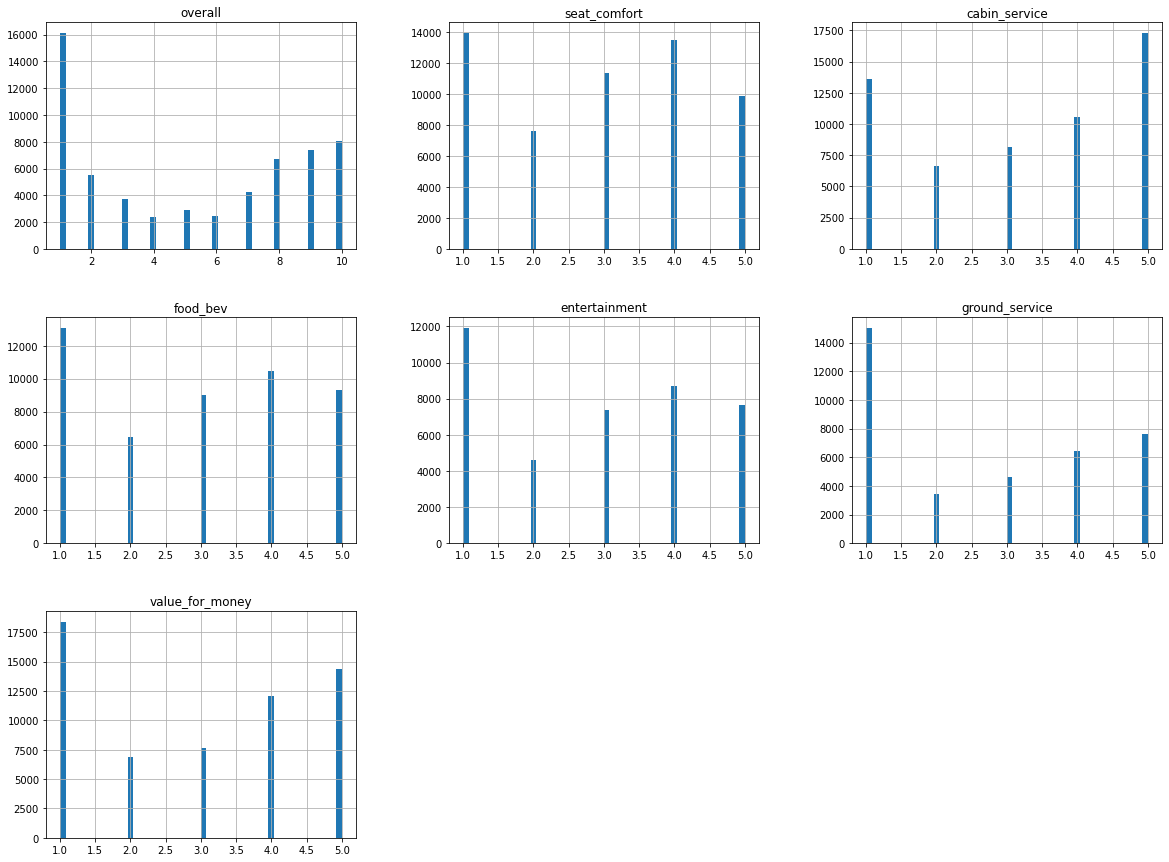

In [13]:
# correlation between using histgram
main_df.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
# Get the number of aircrafts of each type
top_n_aircraft_type = main_df['aircraft'].value_counts()
top_n_aircraft_type

A320                        2130
A380                        1109
Boeing 777                  1101
Boeing 737-800              1021
A330                         974
                            ... 
B777-31H(ER)                   1
Boeing 777-300ER / 787-8       1
A320, Boeing 767-300           1
A321, A319                     1
B747-400/A321                  1
Name: aircraft, Length: 2088, dtype: int64

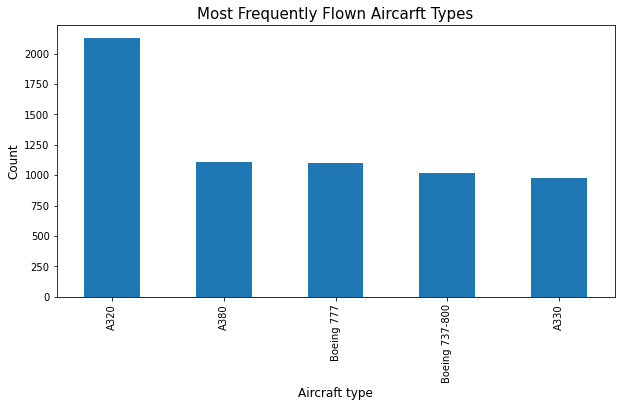

In [15]:
# Visualize the top 5 most frequently flown aircarft types
plt.figure(figsize=(10,5))
top_n_aircraft_type[:5].plot(kind='bar')
plt.xlabel('Aircraft type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Most Frequently Flown Aircarft Types',fontsize=15)
plt.show()

We have observed that the top 5 type of aircrafts that has maximum trips are-
1. A320
2. A380
3. Boeing 777
4. Boeing 737-800
5. A330

Among these, A320 has the highest number of trips.This is due to the fact that most airlines prefer to have this type of aircraft due to its medium passenger capacity and low operational cost.

In [16]:
# Get the number of trips each airline make.
top_n_airline = main_df['airline'].value_counts()
top_n_airline

Spirit Airlines       2871
American Airlines     2846
United Airlines       2774
British Airways       2731
Emirates              1763
                      ... 
QantasLink             104
Adria Airways           85
Air Arabia              80
Tunisair                71
Thai Smile Airways      48
Name: airline, Length: 81, dtype: int64

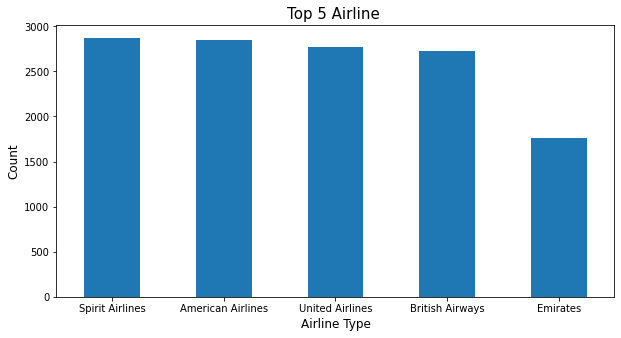

In [17]:
# Visualize the top 5 airlines with most trips
plt.figure(figsize=(10,5))
top_n_airline[:5].plot(kind='bar')
plt.xlabel('Airline Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Top 5 Airline ',fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

We have observed that the top 5 airlines with most trips are-
1. Spirit Airlines
2. American Airlines
3. United Airlines
4. British Airways
5. Emirates

Spirit Airlines has the maximum number of trips and this can be attributed to its ultra low cost fare compared to other airlines.

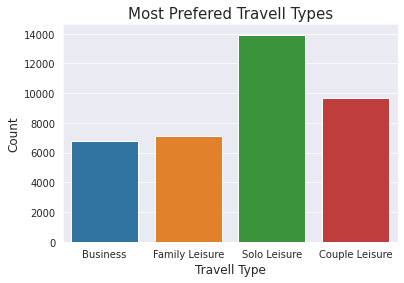

In [18]:
# Get the countplot of traveller_type feature
sns.set_style('darkgrid')
sns.countplot(main_df['traveller_type'])
plt.xlabel('Travell Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Most Prefered Travell Types',fontsize=15)

plt.show()

From the above graph, we have observed that-
* there are four categories of traveller viz.Business,Family,Solo and Couple.
* Solo type of travellers are more in number compared to other types.This can be even backed by the fact that majority of the people around the world travel alone.

In [19]:
# Change the 'date_flown' column to datetime type
main_df['date_flown'] = main_df['date_flown'].apply(lambda x:pd.to_datetime(x))

In [20]:
# Create a column 'travel_month' to identify in which month the passengers travel
main_df['travel_month'] = main_df['date_flown'].dt.month

In [21]:
date_df=main_df['travel_month'].value_counts().reset_index().sort_values(by='index')

In [22]:
date_df.replace({1:'Jan',2:"Feb",3:"Mar",4:'Apr',5:'May',6:'June',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}, inplace=True)

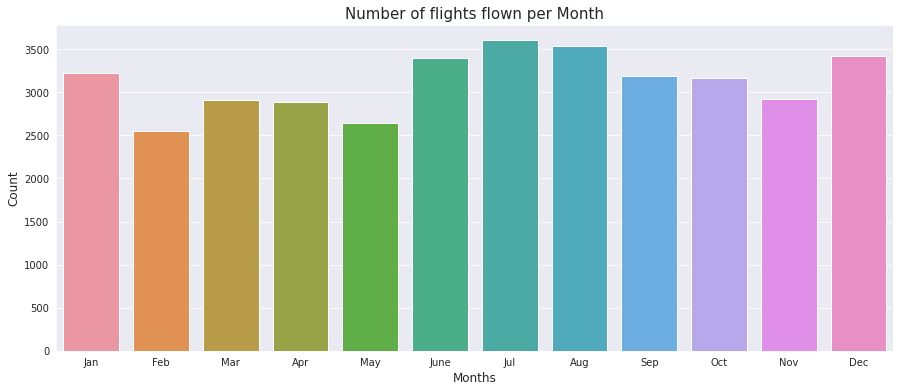

In [23]:
# Get countplot of 'travel_month' feature
plt.figure(figsize=(15,6))
sns.barplot(x='index',y='travel_month', data= date_df)
plt.xlabel('Months',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Number of flights flown per Month',fontsize=15)
plt.show()

From the above graph, we have observed that-
* June,July,August and December are the months in which passengers travel most. This is due to the fact that these months are when people usually take summer and winter vacations and spend their time away from work.

* February,March,April and April are the months with lesser number of trips as these months are busy months.

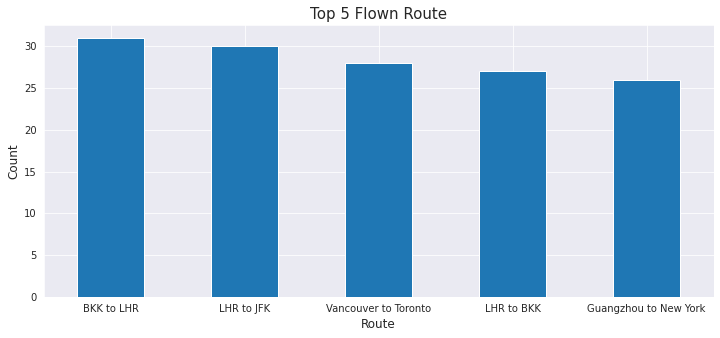

In [24]:
# Get the top 5 most flown route through visualization
plt.figure(figsize=(12,5))
main_df['route'].value_counts()[:5].plot(kind='bar')
plt.xlabel('Route',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Top 5 Flown Route',fontsize=15)
plt.xticks(rotation= 'horizontal')
plt.show()

From the above graph, we have observed that the top 5 most flown route are-
1. BKK to LHR
2. LHR to JKF
3. Vancover to Toronto
4. LHR to BKK
5. Guangzhou to New York


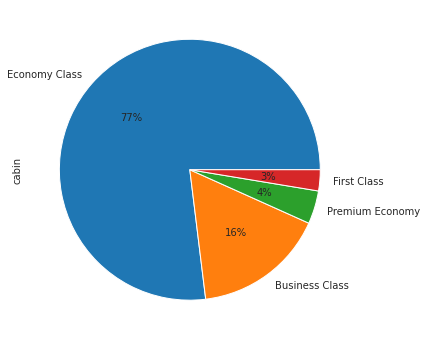

In [25]:
# Get the number of passengers for each cabin class through pie chart visualization
main_df['cabin'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(15,6))

From the above graph, we have observed that-
* 77% of passengers chose to fly in economy class as this category fare is lesser.
* Only 16% chose to fly by business class.

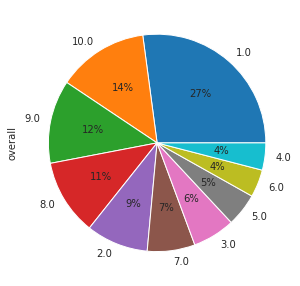

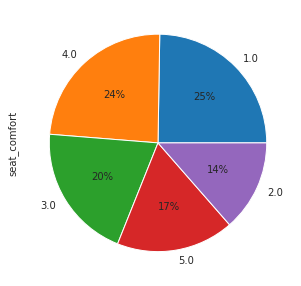

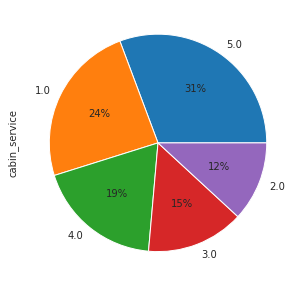

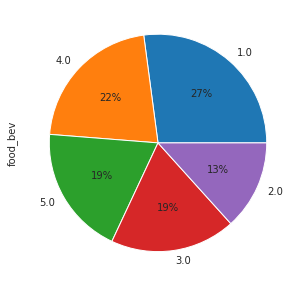

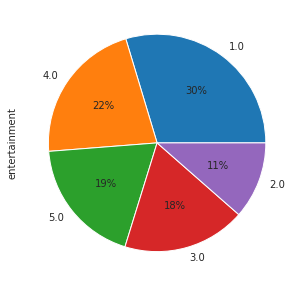

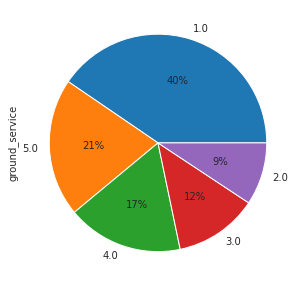

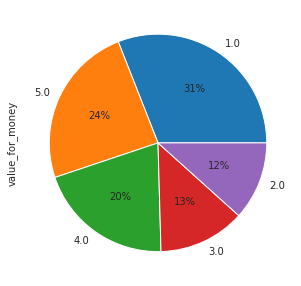

In [26]:
# Get the percentage distribution of passengers with different ratings for numerical features
for col in ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']:
  fig = plt.figure(figsize=(10, 5))
  ax = fig.gca()
  main_df[col].value_counts().plot(kind='pie',autopct='%1.0f%%')

From the above graphs, we have observed that-
* 44 % of passengers gave an overall rating of 7 and above on a scale of 10, for the services offered by the airlines.It implies that this section of people think that airlines are giving good services.

* 25 % of passengers are not satisfied with seat comfort.31% of passengers are fully statisfied with the cabin services.

* 41% of passengers are satisfied with food and beverages provided and 30% of passengers extremely dislikes the entertaintment service provided.

* 40% of passengers extremely dislikes the ground service and 44 % considers the trip to be value for money.

In [ ]:
#Function for Stacked plot of rating features
def stacked_plot(feat):
  ''' Stacked plot of rating features'''
  x = main_df.groupby([main_df['overall']])
  x[feat].value_counts().unstack().plot(kind= 'bar',stacked = True, figsize=(12,6))

In [ ]:
review_features = ['seat_comfort','cabin_service','food_bev','entertainment', 'ground_service', 'value_for_money']

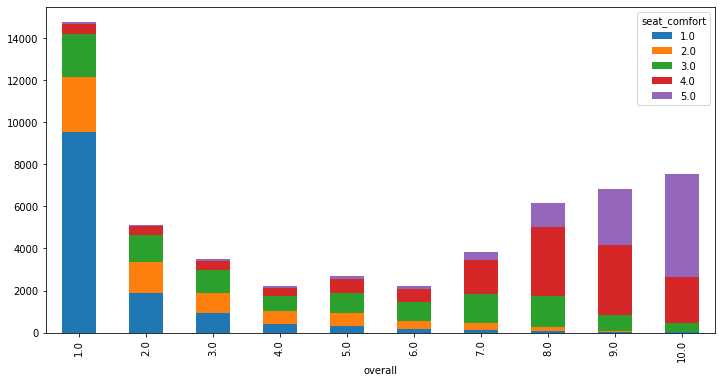

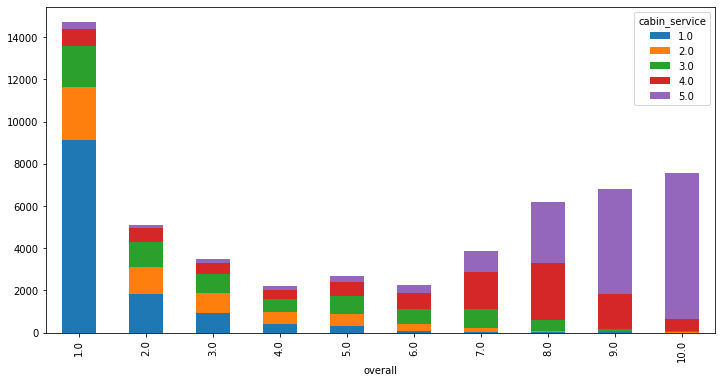

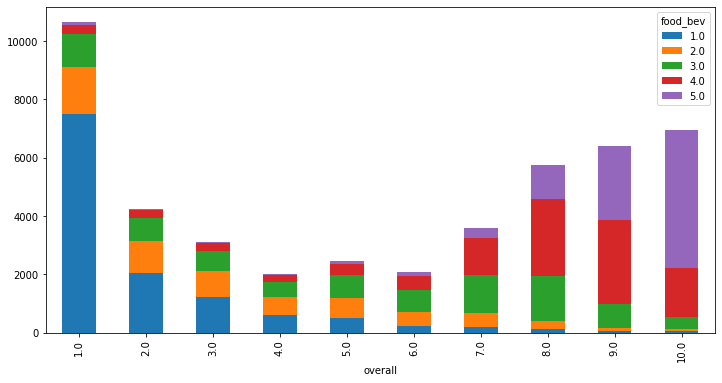

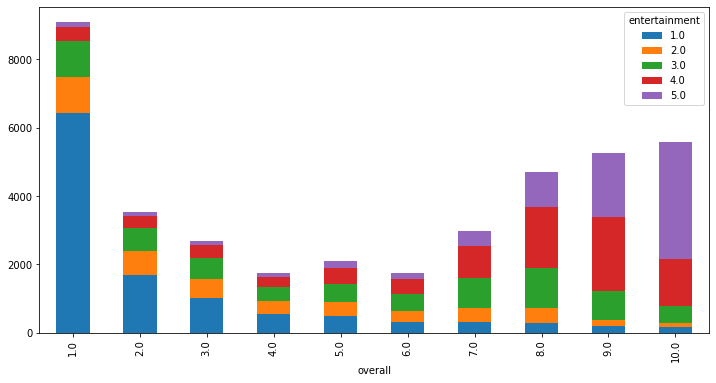

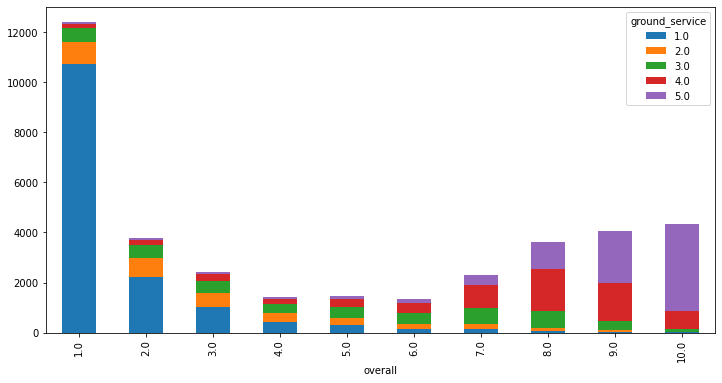

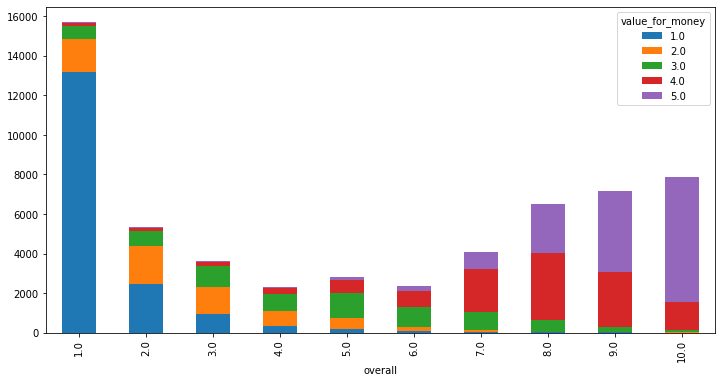

In [ ]:
# Get Stacked plot of rating features.
for feat in review_features:
  stacked_plot(feat)

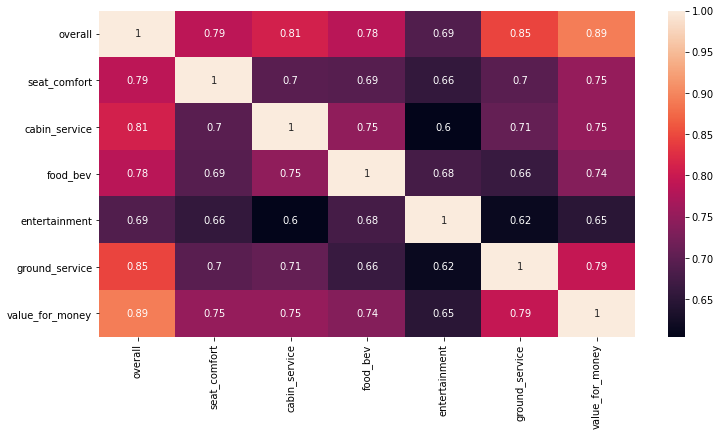

In [ ]:
# Get correlation mtarix on different rating features
cor_matrix =abs( main_df.drop('travel_month',axis=1).corr())

# Get heatmap of correlation matrix on the dataset
plt.figure(figsize=(12,6))
sns.heatmap(cor_matrix,annot = True)

###Imputing NaN values 


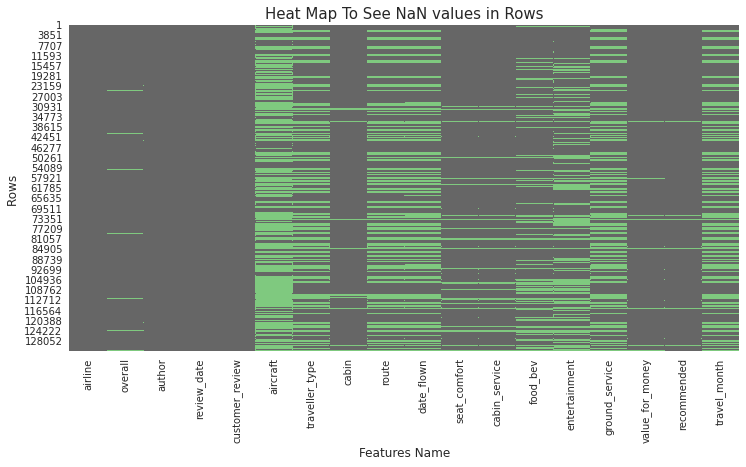

In [27]:
#Ploting heatmap to see NaN values in each features
plt.figure(figsize=(12,6))
sns.heatmap(main_df.isna(),cbar=False,cmap='Accent_r')
plt.xlabel('Features Name',fontsize=12)
plt.ylabel('Rows ',fontsize=12)
plt.title('Heat Map To See NaN values in Rows',fontsize='15')
plt.show()

In [28]:
# Counting  NaN values in each features
main_df.isna().sum()

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
travel_month       23749
dtype: int64

From above, we can see that there are many Nan values present in most of the features.

###Describe dataset to find out statistical summary.

In [29]:
# Finding statistical value of numerical columns
main_df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,travel_month
count,59401.000000,56211.000000,56240.000000,48341.000000,40230.000000,37169.000000,59327.000000,37434.000000
mean,5.164863,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849,6.655607
std,3.483701,1.436467,1.568429,1.483122,1.504452,1.613995,1.588433,3.423703
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,10.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000


### Checking  Imbalance in dataset

---



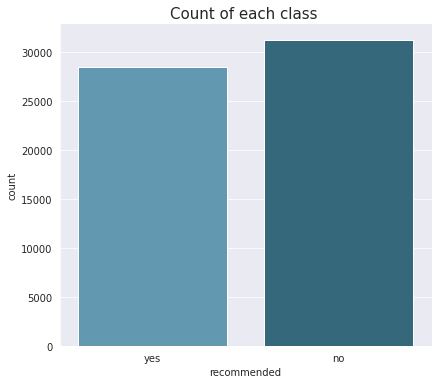

In [30]:
# Ploting a bar graph to show count of class in recommended feature
sns.factorplot(x="recommended", data=main_df, kind="count", size=5, aspect=1.2, palette="PuBuGn_d")
plt.title('Count of each class ',fontsize=15)
plt.show()

In [31]:
#No of nan values in recommeded column
main_df['recommended'].isna().sum()

1422

### Understanding relation Between Target variable and Independent variable

In [32]:
# Features present in dataset
features= main_df.columns
features

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'travel_month'],
      dtype='object')

In [33]:
# Creating list of idependent variable which hare numerical or having low class in features 
features_1= features.drop(['airline','author','aircraft','review_date', 'customer_review','route','recommended'])

overall


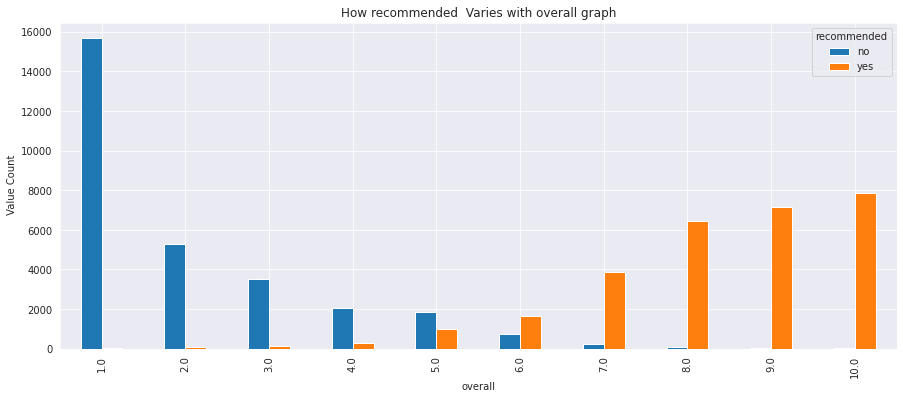

traveller_type


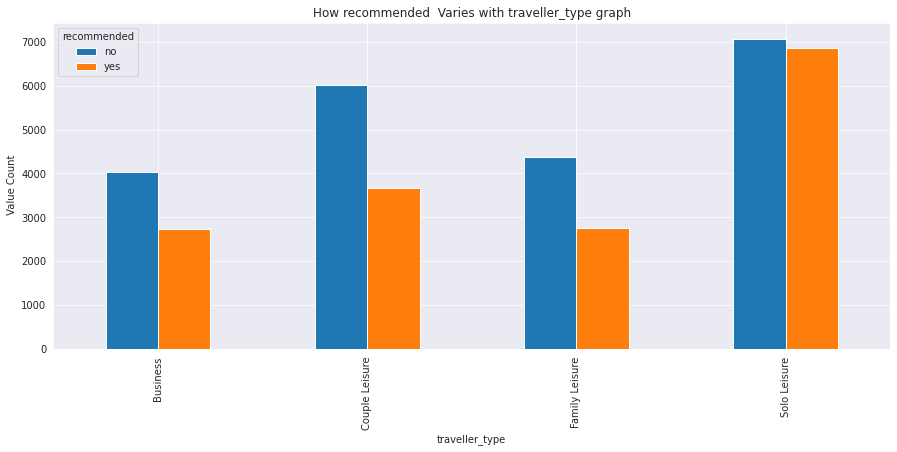

cabin


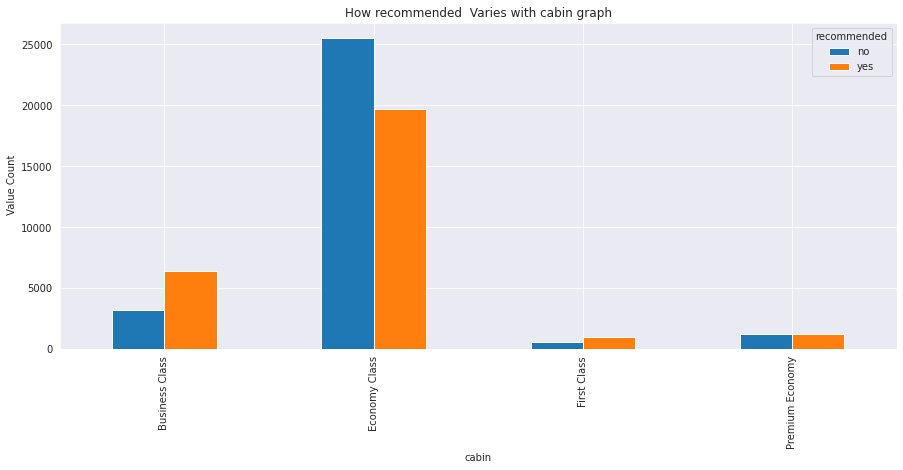

date_flown


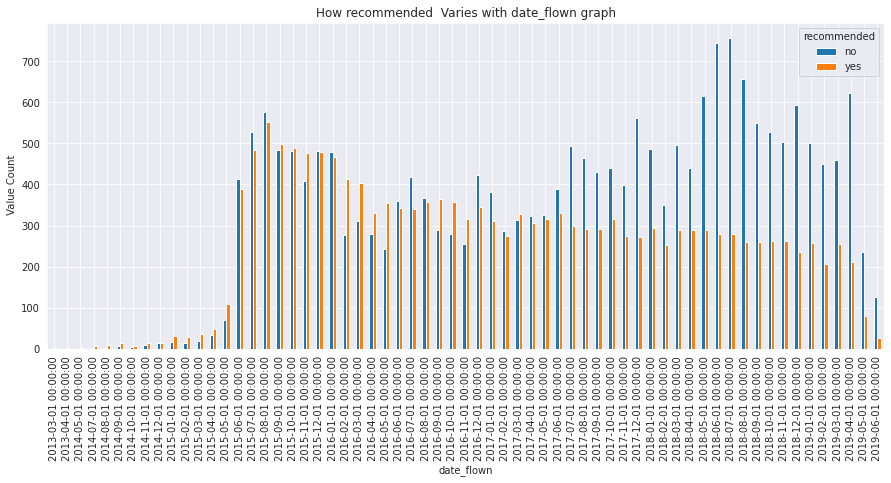

seat_comfort


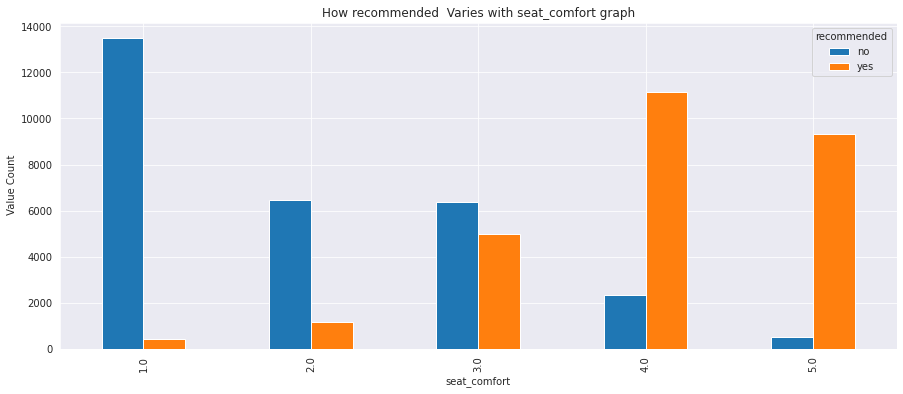

cabin_service


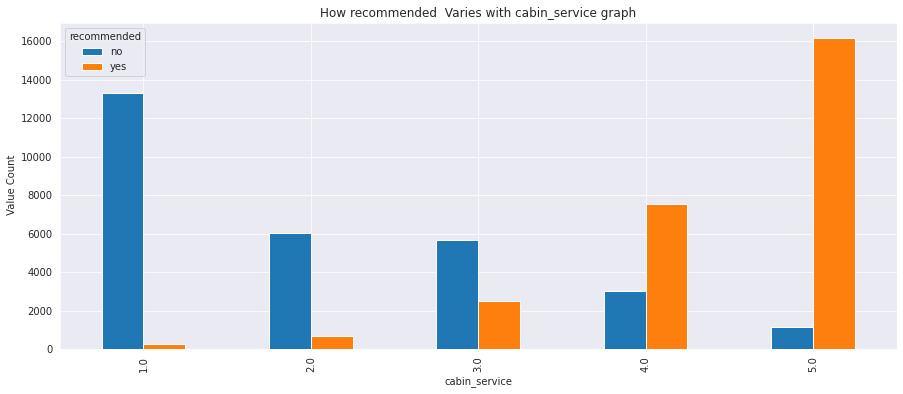

food_bev


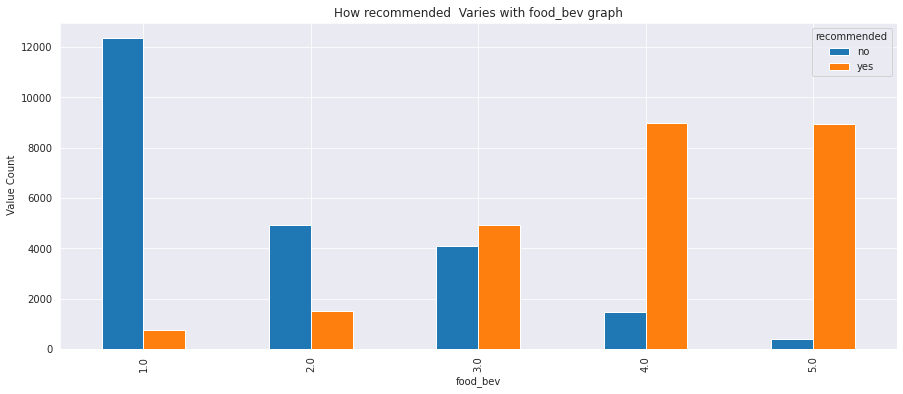

entertainment


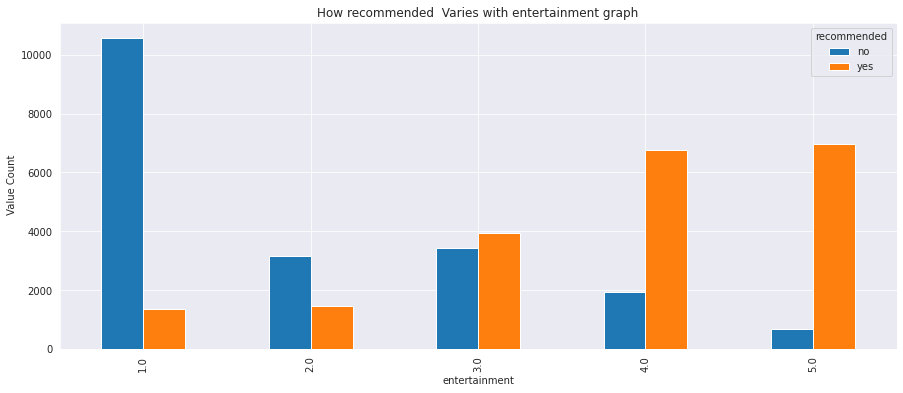

ground_service


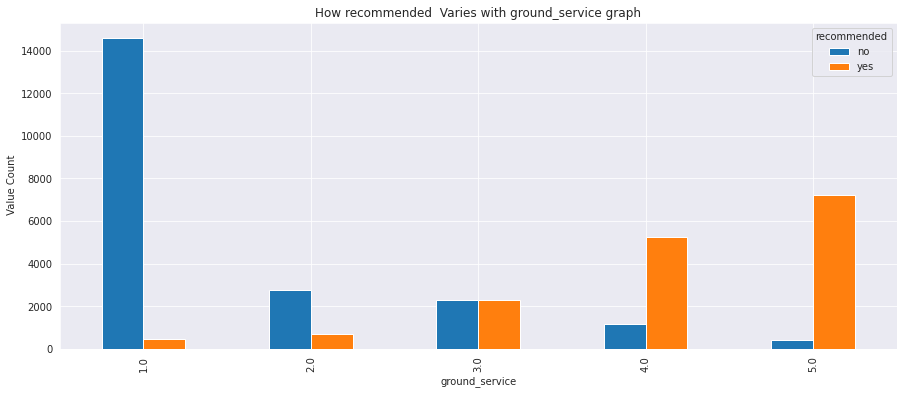

value_for_money


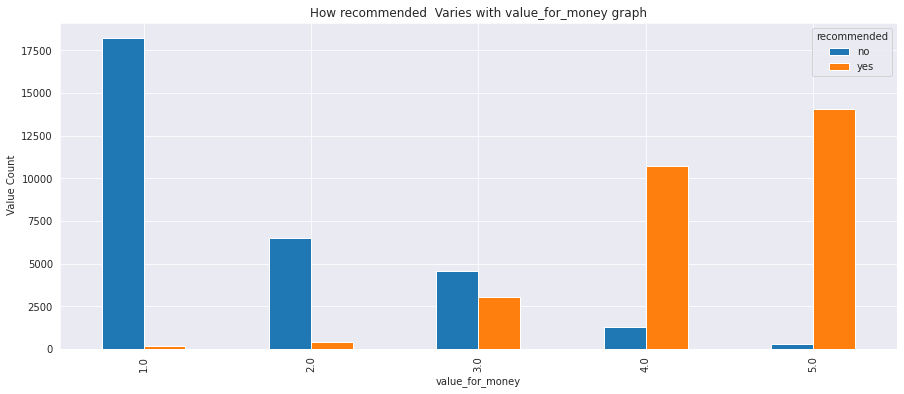

travel_month


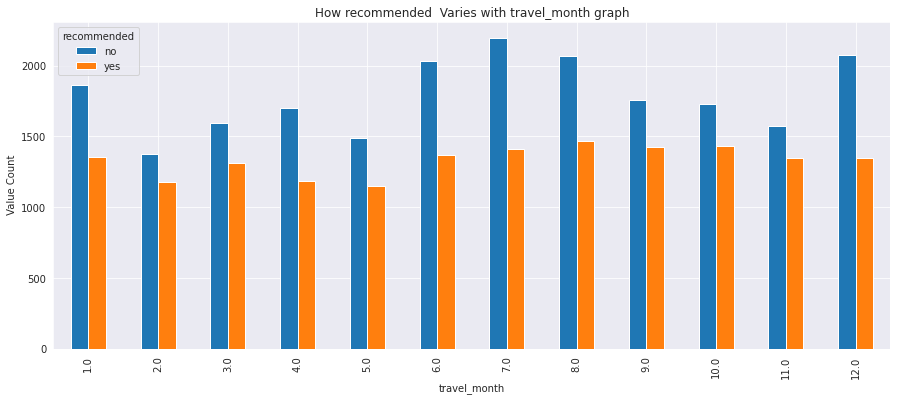

In [34]:
# Ploting graph of count of feature grouped by target variable 
for feature in features_1:
  print(feature)
  main_df.groupby([feature])['recommended'].value_counts().unstack().plot(kind='bar',figsize=(15,6))
  plt.title(f'How recommended  Varies with {feature} graph')
  plt.ylabel(' Value Count')
  plt.xlabel(feature)
  plt.show()


###Conclusion of above graphs

**Numerical Features**
* From all above graphs we can see that when a person have given higher rating then we have also recommended to the  friend.
* We can also see some anomilities where a person have given very low rating and still recommended and visa versa.

> Overall feature
 * So one thing we can be sure of that if a person have given an overall rating of less than 2 we wont be recommended.
 * Whereas a person who have given a rating greater than 8 there are high chances that he will recommend.

**Categorical Features**
> Travel Type
 * The number of not recommended is higher in all the Travel type class
 but couple is one class where the diffrence is higher Where as solo class have minimun diffrence.
 * From above we can conclude that people travelling in groups face more problems than people travelling alone.

> Cabin
 * Economy class is most unsatisfied by the services provided by the airline, thats why majority of them are not recommending.




##Imputation of Missing values in Target variable

In [35]:
# creating a seprate dataset to perform 
# data for navie bayes model
text_df=main_df[['customer_review','recommended']]
text_df

,customer_review,recommended
1,âœ… Trip Verified | London to Izmir via Istanb...,yes
3,âœ… Trip Verified | Istanbul to Bucharest. We ...,no
5,âœ… Trip Verified | Rome to Prishtina via Ista...,no
7,âœ… Trip Verified | Flew on Turkish Airlines I...,yes
9,âœ… Trip Verified | Mumbai to Dublin via Istan...,no
...,...,...
131886,Two domestic flights between Kiev and Lviv las...,no
131888,I had a good flight from London to Kiev with U...,no
131890,Kiev - London (Gatwick) in business class (in ...,no
131892,Several flights - KBP to AMS (3 times one way)...,no


In [36]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 1 to 131894
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_review  61183 non-null  object
 1   recommended      59761 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [37]:
# calulating the len of text
text_df['review_len']= text_df['customer_review'].str.len()

In [38]:

text_df

,customer_review,recommended,review_len
1,âœ… Trip Verified | London to Izmir via Istanb...,yes,1143
3,âœ… Trip Verified | Istanbul to Bucharest. We ...,no,467
5,âœ… Trip Verified | Rome to Prishtina via Ista...,no,1648
7,âœ… Trip Verified | Flew on Turkish Airlines I...,yes,955
9,âœ… Trip Verified | Mumbai to Dublin via Istan...,no,416
...,...,...,...
131886,Two domestic flights between Kiev and Lviv las...,no,546
131888,I had a good flight from London to Kiev with U...,no,450
131890,Kiev - London (Gatwick) in business class (in ...,no,1531
131892,Several flights - KBP to AMS (3 times one way)...,no,772


### Distribution of review lenght 

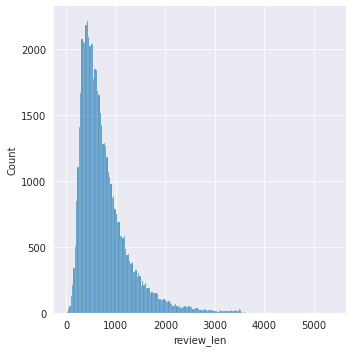

In [39]:
sns.displot(text_df['review_len'])

## Relation between len of text review and recommended columns

##Box plot

In [40]:
# doing goupby to plot bar graphs on bases of yes and no
GN= text_df.groupby('recommended')

no


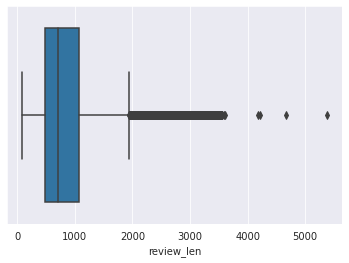

yes


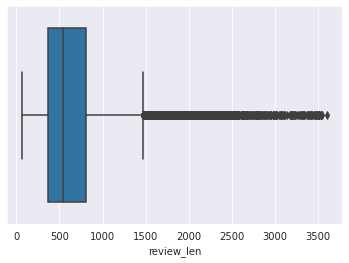

In [41]:
for name , name_df in GN:
  print(name)
  sns.boxplot(x='review_len',data= name_df)
  plt.show()

From above boxplot we can conclude that as the length of text increases the recommended value will be no

###Text Processesing  

In [42]:
# import re for regularExpression
# importing natural language toolkit
import re
import nltk


In [43]:
# importing stopwords from nitk corpus
from nltk.corpus import stopwords

In [44]:
# downloading all stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [45]:
# selecting all stop words from english 
stop_words=stopwords.words('english')

In [46]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [47]:
def text_cleaning(data):

  #remove all special character
  processed_feature = re.sub(r'\W', ' ', str(data))

  # remove all single characters
  processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

  # Remove single characters from the start
  processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

  # Substituting multiple spaces with single space
  processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

  # Removing prefixed 'b'
  processed_feature = re.sub(r'^b\s+', '', processed_feature)

  # Converting to Lowercase
  processed_feature = processed_feature.lower()

  
  processed_feature = processed_feature.split(' ')

  # using lemmatization on words
  processed_feature = [lemmatizer.lemmatize(i) for i in processed_feature]

  # creating 2gram 
  processed_feature = [ ''.join(processed_feature[i:i+2]) for i in range(len(processed_feature)-1)]
  

  # removing stopword
  processed_feature = ' '.join([i for i in processed_feature if i not in stop_words])

  return processed_feature

    
  

In [48]:
# creating token of words with the help of text cleaning function
text_df['tokenized_mess'] = text_df['customer_review'].apply(text_cleaning)

In [49]:
text_df

,customer_review,recommended,review_len,tokenized_mess
1,âœ… Trip Verified | London to Izmir via Istanb...,yes,1143,âœtrip tripverified verifiedlondon londonto to...
3,âœ… Trip Verified | Istanbul to Bucharest. We ...,no,467,âœtrip tripverified verifiedistanbul istanbult...
5,âœ… Trip Verified | Rome to Prishtina via Ista...,no,1648,âœtrip tripverified verifiedrome rometo topris...
7,âœ… Trip Verified | Flew on Turkish Airlines I...,yes,955,âœtrip tripverified verifiedflew flewon onturk...
9,âœ… Trip Verified | Mumbai to Dublin via Istan...,no,416,âœtrip tripverified verifiedmumbai mumbaito to...
...,...,...,...,...
131886,Two domestic flights between Kiev and Lviv las...,no,546,twodomestic domesticflight flightbetween betwe...
131888,I had a good flight from London to Kiev with U...,no,450,ihad hadgood goodflight flightfrom fromlondon ...
131890,Kiev - London (Gatwick) in business class (in ...,no,1531,kievlondon londongatwick gatwickin inbusiness ...
131892,Several flights - KBP to AMS (3 times one way)...,no,772,severalflight flightkbp kbpto toam am3 3time t...


Seprating NaN and Non Nan values in recommender columns

In [50]:
# dataset when we dropped all NaN values from recommended columns
text_df_1 = text_df.dropna() 

In [51]:
# dataset with NaN values
text_df_2 = text_df[text_df['recommended'].isna()]


Creating Testing and training dataset

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
# creating test train set for model training  on data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(text_df_1['tokenized_mess'],text_df_1['recommended'],test_size=0.25)

### TF-idf vectorization

In [54]:
# there are more than 10K features 
# setting max_features to 7500 for system performance 
vectorization = TfidfVectorizer(max_features=7500,min_df=7,max_df=0.8)

In [55]:
# creating array of taining dataset
X_train = vectorization.fit_transform(X_train).toarray()

# creating array on test dataset with the help of toarray
X_test = vectorization.transform(X_test).toarray()

In [56]:
len(vectorization.get_feature_names())

7500

In [57]:
#importing naive bayes classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB


Applying Multinomial Naive bayes

In [60]:
#creating MultinomialNaive bayes
MNB = MultinomialNB().fit(X_train,y_train)

In [61]:
# predicting on train data
y_train_pred_mnb = MNB.predict(X_train)

# predicting on test data
y_test_pred_mnb = MNB.predict(X_test)

In [63]:
# importing classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

####Result of MultinomialNB

In [64]:
print(classification_report(y_train,y_train_pred_mnb))
print("\n")
print(classification_report(y_test,y_test_pred_mnb))

              precision    recall  f1-score   support

          no       0.89      0.85      0.87     23435
         yes       0.84      0.88      0.86     21385

    accuracy                           0.87     44820
   macro avg       0.87      0.87      0.87     44820
weighted avg       0.87      0.87      0.87     44820



              precision    recall  f1-score   support

          no       0.89      0.85      0.87      7833
         yes       0.84      0.88      0.86      7108

    accuracy                           0.86     14941
   macro avg       0.86      0.86      0.86     14941
weighted avg       0.86      0.86      0.86     14941



With the help of this classifier lets try to find the NaN values of recommender columns.

In [65]:
# creating arry of word with the help of tf-idfvectorizer 
# on NaN value dataset
X_new= vectorization.transform(text_df_2['tokenized_mess']).toarray()

In [66]:
# predicting on NaN dataset
text_df_2['recommended']=  MNB.predict(X_new)

In [67]:
text_df_2

,customer_review,recommended,review_len,tokenized_mess
65,âœ… Trip Verified | Lagos to Istanbul via Kath...,no,629,âœtrip tripverified verifiedlagos lagosto tois...
153,âœ… Trip Verified | Seychelles to Birmingham v...,no,469,âœtrip tripverified verifiedseychelles seychel...
209,âœ… Trip Verified | London to Bangkok via Ista...,yes,213,âœtrip tripverified verifiedlondon londonto to...
211,âœ… Trip Verified | At check-in in Johannesbur...,no,803,âœtrip tripverified verifiedat atcheck checkin...
261,âœ… Trip Verified | San Francisco to Mashhad v...,no,527,âœtrip tripverified verifiedsan sanfrancisco f...
...,...,...,...,...
131460,âœ… Trip Verified | Kiev to Riga. 24 hrs befor...,no,1437,âœtrip tripverified verifiedkiev kievto toriga...
131554,âœ… Verified Review | Flew Ukraine Internation...,no,1375,âœverified verifiedreview reviewflew flewukrai...
131648,We travelled Ukraine International from London...,no,1431,wetravelled travelledukraine ukraineinternatio...
131726,DXB-KBP-LGW. Both planes were 737-800s but the...,yes,411,dxbkbp kbplgw lgwboth bothplane planewere were...


### Imputing the result of above model in missing values of recommender feature


In [68]:
#varibale which have Nan values in recommended features
recommended_nan = main_df['recommended'].isna()

In [69]:
# imputation of depended variable with prediction MNB model
main_df.loc[recommended_nan,'recommended'] = text_df_2['recommended']

## Removing Non important features from dataset


As from heat map we can see that there are few features which have NaN values, it would be right decision to drop the features which have More that 60% values as NaN, as imputing them will only create baisness in the dataset

In [70]:
# Function to show percentage of NAN value in each column
def null_percentage(name):
  'this function will collect all features which have nan vaalues more than 60%'
  drop_features =[]
  for i in name:
    null_value= main_df[i].isna().sum()
    if (null_value/len(main_df)) > 0.6:
      drop_features.append(i)

  return drop_features

In [71]:
features= main_df.columns
features

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'travel_month'],
      dtype='object')

In [72]:
droping_features= null_percentage(features)
droping_features


['aircraft']

In [73]:
# No. of different aircraft present in aircraft column 
len(main_df.aircraft.unique())

2089

In [74]:
# Droping the feature
main_df.drop(droping_features,axis=1,inplace=True)

#### Imputing NaN in numerical columns

* We have 7 numerical columns. 

* If a person have given high review to seat_comfort, food_bev, ground service, cabin_service ,entertainment then there is high chance that overall ratting will also be high and visa versa.

* We have also seen that recommended is highly dependent on overall review.


Let's try to find all rows which have nan values for every numerical variable.

In [75]:
main_df.head()

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,travel_month
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,2019-05-01,4.0,5.0,4.0,4.0,2.0,4.0,yes,5.0
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01,4.0,1.0,1.0,1.0,1.0,1.0,no,5.0
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01,1.0,4.0,1.0,3.0,1.0,2.0,no,5.0
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,Washington Dulles to Karachi,2019-04-01,4.0,5.0,5.0,5.0,5.0,5.0,yes,4.0
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01,1.0,1.0,1.0,1.0,1.0,1.0,no,5.0


In [76]:
# Selcting all rows which have numeriacal feature as Nan
Nan_no = (main_df['overall'].isna()) & (main_df['recommended']=='no') & (main_df['seat_comfort'].isna()) & (main_df['food_bev'].isna()) & (main_df['entertainment'].isna()) & (main_df['ground_service'].isna() & main_df['value_for_money'].isna() & (main_df['cabin_service'].isna()))

In [77]:
# Checking the rows 
main_df[Nan_no].head()

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,travel_month
13775,KLM Royal Dutch Airlines,NaN,H Henry,6th August 2014,Amsterdam to LHR - travelled on KLM after 14 y...,NaN,Business Class,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
14435,Virgin America,NaN,Kathleen Daley,24th February 2015,I was sending 3 people out to Los Angeles for ...,NaN,Economy Class,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
23179,Delta Air Lines,NaN,C Tellefsen,14th September 2014,I keep making the mistake of choosing Delta. I...,NaN,Economy Class,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
25095,Southwest Airlines,NaN,A Morgan,29th November 2013,I have been a Southwest customer for years and...,NaN,Economy Class,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
25431,Southwest Airlines,NaN,J Fenston,11th July 2011,Never flying Southwest again. Their boarding/s...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN


Here we found all rows which have recommended as no and NaN values in all review columns.We will be replacing these NaN values whith 1.

In [78]:
# Fill Nan values by 1
main_df.loc[Nan_no,['overall','seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']] = main_df.loc[Nan_no,['overall','seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']].fillna(1)

In [79]:
# checking the dataframe after imputation
main_df.loc[Nan_no]

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,travel_month
13775,KLM Royal Dutch Airlines,1.0,H Henry,6th August 2014,Amsterdam to LHR - travelled on KLM after 14 y...,NaN,Business Class,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN
14435,Virgin America,1.0,Kathleen Daley,24th February 2015,I was sending 3 people out to Los Angeles for ...,NaN,Economy Class,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN
23179,Delta Air Lines,1.0,C Tellefsen,14th September 2014,I keep making the mistake of choosing Delta. I...,NaN,Economy Class,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN
25095,Southwest Airlines,1.0,A Morgan,29th November 2013,I have been a Southwest customer for years and...,NaN,Economy Class,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN
25431,Southwest Airlines,1.0,J Fenston,11th July 2011,Never flying Southwest again. Their boarding/s...,NaN,NaN,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,1.0,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN
131888,Ukraine International,1.0,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN
131890,Ukraine International,1.0,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN
131892,Ukraine International,1.0,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN


#### When recommended is YES,

* the numerical features are having NaN values.

* replacing those NaN values to a valid value on the bases of recommended column.

In [80]:
Nan_yes=(main_df['overall'].isna()) & (main_df['recommended']=='yes') & (main_df['seat_comfort'].isna()) & (main_df['food_bev'].isna()) & (main_df['entertainment'].isna()) & (main_df['ground_service'].isna() & main_df['value_for_money'].isna())

In [81]:
# Fillinng Nan vaues by 5
main_df.loc[Nan_yes,['seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']] =main_df.loc[Nan_yes,['seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']].fillna(5)

### Replacing NaN values in numerical features apart from overall feature to median values of respected features

In [82]:
main_df[['seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']] = main_df[['seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']].fillna(main_df[['seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']].median())

In [83]:
main_df.isna().sum()

airline                0
overall             1642
author                 0
review_date            0
customer_review        0
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort           0
cabin_service          0
food_bev               0
entertainment          0
ground_service         0
value_for_money        0
recommended            0
travel_month       23749
dtype: int64

###Creating a Average column which have avrg score of (all numerical features except overall)

In [84]:
main_df['Avg_num']= (main_df['seat_comfort']+ main_df['cabin_service']+ main_df['food_bev']+main_df['entertainment']+main_df['ground_service']+main_df['value_for_money'])//6

### Finding NaN in overall feature
We will be replacing all Nan values in overall feature by avg colummn

In [85]:
# Finding all nan values in overall
m=(main_df['overall'].isna())

In [86]:
# Filling NaN value in overall with 2* avg num
main_df.loc[m,'overall']= main_df.loc[m,'Avg_num']*2

####Droping all Non important columns/features

Here,we come across few columns which such as Author name , date, route , travel month which will not be having any impact on model.



In [88]:
 # Droping Non important features
main_df.drop(['author','review_date','date_flown','route','travel_month','Avg_num'],axis=1,inplace=True)

## working on Text and Categorical features

**Airline**

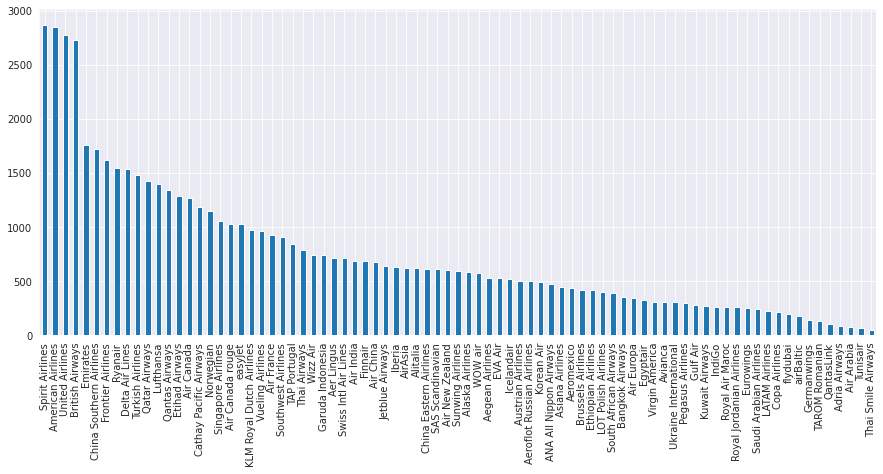

In [89]:
# Graph showing count of each airline.
main_df['airline'].value_counts().plot(kind='bar',figsize=(15,6))

We can do one hot incoding to these categorical values.

**Cabin**

In [90]:
# Counting number of unique classes in this feature
main_df['cabin'].value_counts()

Economy Class      45171
Business Class      9590
Premium Economy     2412
First Class         1532
Name: cabin, dtype: int64

**Travel Type**

In [91]:
# Counting number of unique classes in this feature
main_df['traveller_type'].value_counts()

Solo Leisure      13935
Couple Leisure     9699
Family Leisure     7142
Business           6764
Name: traveller_type, dtype: int64

###Converting text values into numerical values 

In [92]:
# Converting text into numerical
# replacing yes =1 and no =0 in recommended column
main_df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [93]:
# checking for NaN values in columns
main_df.isna().sum()

airline                0
overall                0
customer_review        0
traveller_type     23643
cabin               2478
seat_comfort           0
cabin_service          0
food_bev               0
entertainment          0
ground_service         0
value_for_money        0
recommended            0
dtype: int64

## Sentiment analysis using vadar

In [94]:
# Install vaderSentiment package
!pip install vaderSentiment

     |████████████████████████████████| 133kB 6.5MB/s 


In [95]:
# Import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [96]:
# Function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
  
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
  
    # polarity_scores method of SentimentIntensityAnalyzer
    # oject gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)

    return  sentiment_dict['compound']

In [97]:
# Creating a polarity column
# to store sentiment analysis score on text data
main_df['polarity']= main_df['customer_review'].apply(sentiment_scores)

## Converting qualitative features into number for machine learning as  most machine learning alogorithm takes numerical values.

 In our dataset we have 3 categorical columns. 
> Airline
 * airline columns have zero NaN values.So, we can we Dummy variable encoding as this will give us one less feature as airline column have large number of categoreis.

> Travell type
 * These values dont have natural ordering and column have NaN values. So, it's better to use One hot encoding.
 *  Here we have 4 class 
  * Solo
  * Couple
  * Family
  * Business

 

> Cabin
*  These values have a natural ordering as business class is expensive than economy class.
* We can rank these classes in this dataset. Higher ranking means better.
 * economy =  1
 * premium economy = 2
 * business class = 3
 * first class = 4

 * But we are having Nan value in these features. So, we will be doing one hot encoding.

   

###One hot encoding for categorical variables

In [98]:
# categoriacal features to do one hot encoding
colms=['airline','cabin','traveller_type']

In [99]:
new_df= pd.get_dummies(main_df,columns=colms)

In [100]:
# Define independent features
ind_features = new_df.columns.drop(['customer_review','recommended'])


In [101]:
# Define dependent features
dep_features = 'recommended'

In [102]:
# Get independent features
ind_features

Index(['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'polarity',
       'airline_ANA All Nippon Airways', 'airline_Adria Airways',
       'airline_Aegean Airlines', 'airline_Aer Lingus',
       'airline_Aeroflot Russian Airlines', 'airline_Aeromexico',
       'airline_Air Arabia', 'airline_Air Canada', 'airline_Air Canada rouge',
       'airline_Air China', 'airline_Air Europa', 'airline_Air France',
       'airline_Air India', 'airline_Air New Zealand', 'airline_AirAsia',
       'airline_Alaska Airlines', 'airline_Alitalia',
       'airline_American Airlines', 'airline_Asiana Airlines',
       'airline_Austrian Airlines', 'airline_Avianca',
       'airline_Bangkok Airways', 'airline_British Airways',
       'airline_Brussels Airlines', 'airline_Cathay Pacific Airways',
       'airline_China Eastern Airlines', 'airline_China Southern Airlines',
       'airline_Copa Airlines', 'airline_Delta Air Lines', 'airline_EVA 

## Feature scaling 


In [103]:
#  Get features
data = new_df[ind_features]
Y= new_df[dep_features]

In [104]:
# importing minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [105]:
# Create an object for MinMaxScaler
feature_scaler= MinMaxScaler()

In [106]:
# Fit the data to perform scaling
data = feature_scaler.fit_transform(data)

In [107]:
data

array([[0.66666667, 0.75      , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.75      , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.22222222, 0.        , 0.75      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Training the dataset 


In [108]:
# Import libraries
from sklearn.model_selection import train_test_split

In [109]:
# Perform Train Test Split
X_train,X_test,y_train,y_test = train_test_split(data,Y, test_size =0.2)


In [110]:
# Get shapes for Train and Test set
X_train.shape,X_test.shape

((48946, 97), (12237, 97))

## Building classifier model using Logistic Regression

In [111]:
# Fit training data on LR
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [113]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)*100
test_accuracy = accuracy_score(test_class_preds,y_test)*100

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  95.57062885629061
The accuracy on test data is  95.17855683582577


In [114]:
# Get the confusion matrix for both train and test

cm1 = confusion_matrix(y_train, train_class_preds)
print('confusion matrix of train \n', cm1)

cm2 = confusion_matrix(y_test, test_class_preds)
print('confusion matrix of test \n', cm2)


confusion matrix of train 
 [[24534  1088]
 [ 1080 22244]]
confusion matrix of test 
 [[6074  291]
 [ 299 5573]]


In [115]:
# Getting all the accuracy metrics of training model
tn, fp, fn, tp = confusion_matrix(y_train, train_class_preds).ravel()

sensitivity = tp / (tp+fn) # Recall.
specificity = tn / (tn+fp)
precision = tp / (tp+fp)

print('Sensitivity/Recall: %.3f' % sensitivity)
print('Specificity: %.3f' % specificity)
print('Precision: %.3f' % precision)

Sensitivity/Recall: 0.954
Specificity: 0.958
Precision: 0.953


In [116]:
# Getting all the accuracy metrics of test model
tn, fp, fn, tp = confusion_matrix(y_test, test_class_preds).ravel()

sensitivity = tp / (tp+fn) # Recall.
specificity = tn / (tn+fp)
precision = tp / (tp+fp)

print('Sensitivity/Recall: %.3f' % sensitivity)
print('Specificity: %.3f' % specificity)
print('Precision: %.3f' % precision)

Sensitivity/Recall: 0.949
Specificity: 0.954
Precision: 0.950


## Using Different Cross validation techniques

In [117]:
#Perform KFold CV
from sklearn.model_selection import KFold

# Define K folds as 4
kf = KFold(n_splits=4)

# Perform RepeatedKFold CV 
scores = []
for train_index, test_index in kf.split(data):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    scores.append(
        accuracy_score(clf.fit(X_train, y_train).predict(X_test), y_test))
    
# Get mean scores for the K folds    
np.mean(scores)

#  Get all accuracy scores for all K folds 
for i in scores:
  i = round(i*100,4)

  print(i)

94.9922
94.7372
95.234
96.6983


In [118]:
# RepeatedKFold
from sklearn.model_selection import RepeatedKFold

# Define K folds as 4
rkf = RepeatedKFold(n_splits=4, n_repeats=2)

# Perform RepeatedKFold CV 
scores = []
for train_index, test_index in rkf.split(data):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    scores.append(
        accuracy_score(clf.fit(X_train, y_train).predict(X_test), y_test)
    )

# Get mean scores for the K folds
np.mean(scores)

# Get all accuracy scores for all K folds
for i in scores:
  i = round(i*100,4)
  print(i)

95.574
95.489
95.3125
95.3645
95.391
95.2863
95.574
95.4953


In [119]:
# Code for K fold Cross validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = clf
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('10 fold scores:',scores)
print('Avg Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

10 fold scores: [0.95336675 0.94879059 0.9559817  0.95816082 0.95336675 0.95816082
 0.9507518  0.95053389 0.95357454 0.95793374]
Avg Accuracy: 0.954 (0.003)


##Build Classifier model using Random Forest

In [120]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

# Fit training data
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  7.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [123]:
# Get best estimator
rf_optimal_model = rf_grid.best_estimator_

In [124]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [125]:
# Calculate, accuracy and auc on train data
rf_train_accuracy = accuracy_score(y_train,train_class_preds)
rf_train_auc = roc_auc_score(y_train,train_class_preds)

# Calculate, accuracyand auc on train data
rf_test_accuracy = accuracy_score(y_test,test_class_preds)
rf_test_auc = roc_auc_score(y_test,test_class_preds)

# Print the results for train
print("Performance on train data ")
print("Accuracy : " ,rf_train_accuracy)
print("AUC ROC Score : ", rf_train_auc)
print("\n")

# Print the results for test
print("Performance on test data ")
print("Accuracy : " ,rf_test_accuracy)
print("AUC ROC Score : ", rf_test_auc)
print("\n")

Performance on train data 
Accuracy :  0.9526891562064156
AUC ROC Score :  0.9522950387810593


Performance on test data 
Accuracy :  0.9544949329846355
AUC ROC Score :  0.9540646043399899




In [126]:
# Get confusion matrix for train and test data sets
conf_matrix_train = confusion_matrix(y_train,train_class_preds)
conf_matrix_test = confusion_matrix(y_test,test_class_preds)

print("The Confusion Matrix for Train Set \n",conf_matrix_train)
print("\n")
print("The Confusion Matrix for Test Set \n",conf_matrix_test)

The Confusion Matrix for Train Set 
 [[23034   931]
 [ 1240 20683]]


The Confusion Matrix for Test Set 
 [[7724  298]
 [ 398 6875]]


No handles with labels found to put in legend.


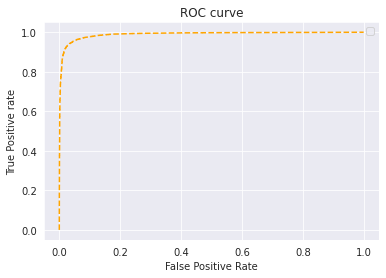

In [127]:
# Get ROC curve on Test data
fpr, tpr, thresh = roc_curve(y_test, test_preds, pos_label=1)
plt.plot(fpr, tpr, linestyle='--',color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')

In [128]:
# Function to plot precision recall curve
def plot_precision_recall_vs_threshold(predictor,predicted):
  '''
  Function to plot  precision recall curve
  '''
  precisions,recalls,thresholds=precision_recall_curve(predictor,predicted)
  plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
  plt.plot(thresholds,recalls[:-1],"g--",label="Recalls")
  plt.xlabel("Threshold")
  plt.legend(loc="upper left")
  plt.ylim([0,1])
  plt.show()

In [129]:
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, confusion_matrix,precision_recall_curve

In [130]:
# Function to plot precision recall curve
def plot_precision_recall_vs_threshold(predictor,predicted):
  '''
  Function to plot  precision recall curve
  '''
  precisions,recalls,thresholds=precision_recall_curve(predictor,predicted)
  plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
  plt.plot(thresholds,recalls[:-1],"g--",label="Recalls")
  plt.xlabel("Threshold")
  plt.legend(loc="upper left")
  plt.ylim([0,1])
  plt.show()

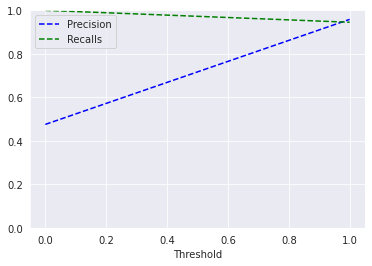

In [131]:
# Get precision recall curve on test data
plot_precision_recall_vs_threshold(y_test,test_class_preds)

###Plot the variable importance

In [132]:
# Get feature importance
features = ind_features
importances = rf_optimal_model.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

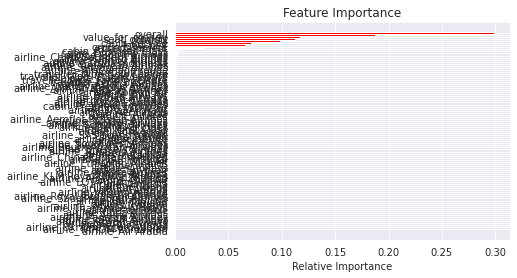

In [133]:
# Plot feature importance graph
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

###Get feature importance using Shap

In [134]:
# Install Shap
!pip install shap

     |████████████████████████████████| 358kB 5.2MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491617 sha256=0aa5dc662680d4803afd7f59aae05e03db348558e5b2df5ddd92e166b3fe9542
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


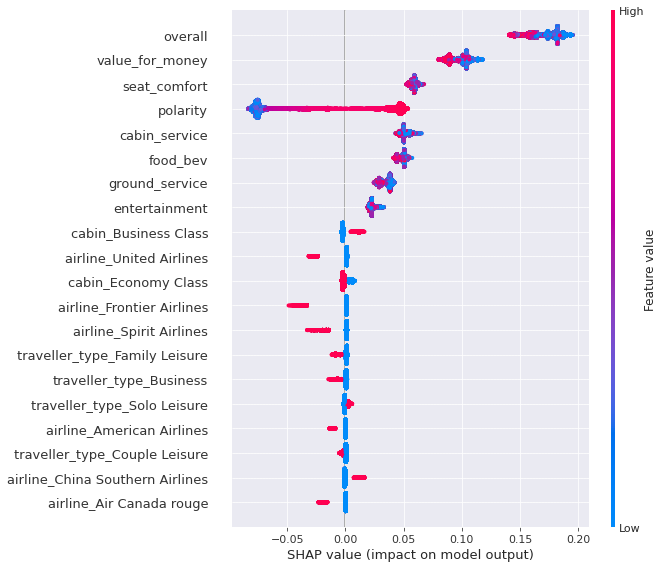

In [135]:
# Get the Shap summary of important features on test data to analyze how each feature contribute in the insurance decisioning process.
import shap
X_shap=new_df.drop(['customer_review','recommended'],axis=1)
explainer = shap.TreeExplainer(rf_optimal_model)
shap_values = explainer.shap_values(X_shap)
shap.summary_plot(shap_values[1], X_shap, plot_type="dot")

From the above graph, we observe that the following are the top 5 features.
1. overall
2. value_for_money
3. cabin_service
4. Polarity
5. seat_comfort


From the above graph, we have observed that-
* 'Overall' feature contribute most to the model's prediction.
* 'Premium Economy' feature contribute the lowest to the model's prediction.


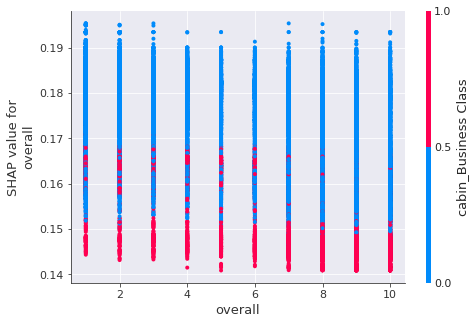

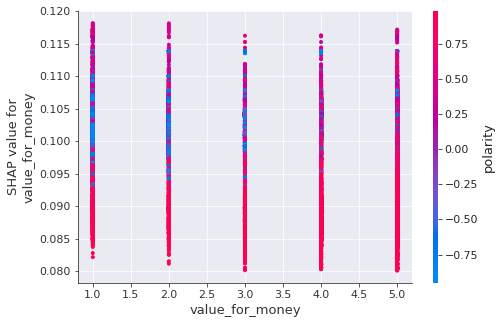

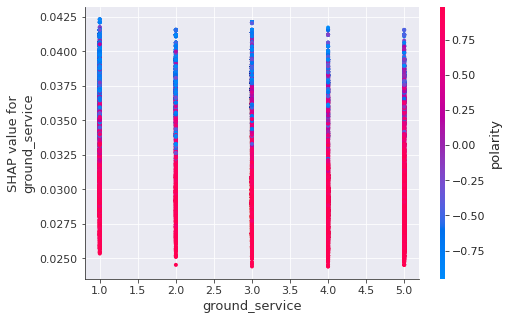

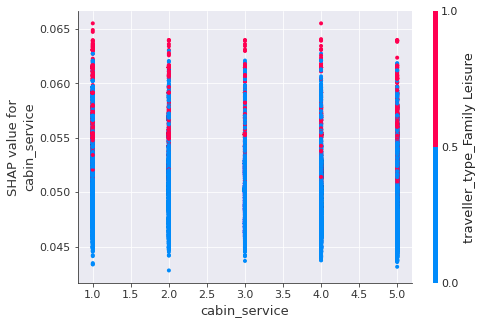

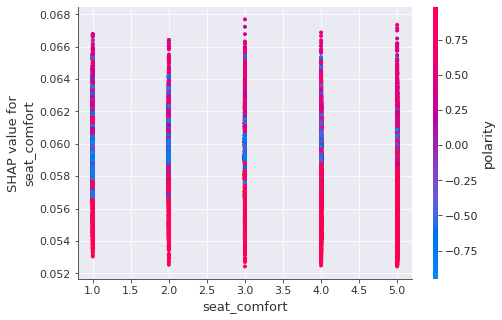

In [136]:
#  Plot dependence of a varaiable on others on test set
top_vars = ['overall', 'value_for_money','ground_service','cabin_service','seat_comfort']
for var in top_vars:
  shap.dependence_plot(var,shap_values[1],new_df.drop(['customer_review','recommended'],axis=1))

The above graph shows the dependence of each of the top 5 features.
*Overall has a dependence on Cabin service and so on.

In [137]:
#Declare the models
lr_model=LogisticRegression(C=10)
dt_model=DecisionTreeClassifier()
rf_model=RandomForestClassifier(max_depth= 60, min_samples_leaf = 1, min_samples_split= 5)
gbc_model=GradientBoostingClassifier()
xgb_model=XGBClassifier()
svc_model=LinearSVC()
Mnb_model=MultinomialNB()


#Create a list of models
models=[lr_model,svc_model,Mnb_model,dt_model,rf_model,gbc_model,xgb_model]

#Creating dictionay for storing the confustion matix
dct_train={}
dct_test={}
lst_imp=[]
# Fuction for calculation the eveluation matrix
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #Read model one by one
    for model in models:
        start = time.time()
        model.fit(X_train,y_train)
        end= time.time()
        y_pred=model.predict(X_test)
        y_pred_train=model.predict(X_train)
        
        #Compute metrics
        train_accuracy=accuracy_score(y_train,y_pred_train)
        test_accuracy=accuracy_score(y_test,y_pred)
        p_score_train=precision_score(y_train,y_pred_train)
        p_score=precision_score(y_test,y_pred)
        r_score_train=recall_score(y_train,y_pred_train)
        r_score=recall_score(y_test,y_pred)
        train_auc = roc_auc_score(y_train,y_pred_train)
        test_auc = roc_auc_score(y_test,y_pred)
        fp, tp, th = roc_curve(y_test, y_pred)
        
        #Insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Train_Accuracy"]=round(train_accuracy*100,2)
        df.loc[i,"Test_Accuracy"]=round(test_accuracy*100,2)
        df.loc[i,"Precision_Train"]=round(p_score_train*100,2)
        df.loc[i,"Precision_Test"]=round(p_score*100,2)
        df.loc[i,"Recall_Train"]=round(r_score_train*100,2)
        df.loc[i,"Recall_test"]=round(r_score*100,2)
        df.loc[i,"ROC_AUC_Train"]=round(train_auc*100,2)
        df.loc[i,"ROC_AUC_Test"]=round(test_auc*100,2)
        df.loc[i,'AUC'] = auc(fp, tp)
        df.loc[i,'MOdel_training_time ']= end-start
        #Inserted in dictionary
        dct_train[model.__class__.__name__]=confusion_matrix(y_train,y_pred_train)
        dct_test[model.__class__.__name__]=confusion_matrix(y_test,y_pred)

        i+=1
    # Return the data frame and dictionary
    return df,dct_train,dct_test

In [138]:
# Get performance matrix dataframe for different classifiers.
final_result_df,dct_train,dct_test=score_model(X_train,y_train,X_test,y_test)

In [139]:
#  Get performance on different models
final_result_df

,Model_Name,Train_Accuracy,Test_Accuracy,Precision_Train,Precision_Test,Recall_Train,Recall_test,ROC_AUC_Train,ROC_AUC_Test,AUC,MOdel_training_time
0,LogisticRegression,95.50,95.49,95.23,95.29,95.37,95.22,95.50,95.48,0.954760,1.484571
1,LinearSVC,95.50,95.47,95.22,95.30,95.37,95.16,95.49,95.45,0.954547,0.496211
2,MultinomialNB,87.28,87.24,82.30,82.47,93.48,92.93,87.55,87.51,0.875098,0.023928
3,DecisionTreeClassifier,99.99,93.63,100.00,93.54,99.99,93.02,99.99,93.60,0.935969,0.673651
4,RandomForestClassifier,98.87,95.60,98.95,96.01,98.68,94.68,98.86,95.56,0.955569,5.848903
5,GradientBoostingClassifier,95.60,95.61,95.59,95.71,95.19,95.02,95.58,95.58,0.955792,17.512406
6,XGBClassifier,95.53,95.57,95.60,95.77,95.02,94.87,95.51,95.53,0.955347,10.080164


From the above table, we have observed that-
* Best test set accuracy is found in LogisticRegression while lowest accuracy score is found in MultinomialNB.
* Best ROC_AUC score is given by LogisticRegression.
* We can conclude that LogisticRegression gives the best model.

##Conclusion:
* From the EDA, we have discovered that A320 is the most commonly used aircraft type and Spirit Airlines is the most flown aircraft by passengers.77% of passengers chose to fly in economy class as it is the most cheapest.

* We have built classifier models using 7 different types of classifiers and all these are able to give accuracy of more than 85%.* We can conclude that LogisticRegression gives the best model.

* The most important feature are overall rating and Value for money that contribute to a model's prediction whether a passenger will recommened a particular airline to his/her friends.

* The classifier models developed can be used to predict passenger referral as it will give airlines ability to identify impactful passengers who can help in bringing more revenues.